# Lab 2 : Linear Classification, Logistic Regression, SVM, Decision Tree, Boosting

---


Total Points: **100**

Tentative Weightage : **9%**

Submission Deadline :  **$23^{th}$ March 2024 , 10:00 AM** (3 weeks)

Submit a separate report to mention any observations asked in the corresponding questions. Without these observations, no points will be provided for the corresponding question.
---



General Instructions:

---



1. You have to do this lab individually
2. You may use **seaborn, matplotlib, pandas, numpy, csv**
3. All the code should be submitted in the form of a single Jupyter notebook itself.
4. Points for each sub-section are mentioned in the appropriate question.
5. You can use Google colab to run a jupyter notebook (https://colab.research.google.com/) How to load data in Google Colab ?(https://towardsdatascience.com/3-ways-to-load-csv-files-into-colab-7c14fcbdcb92) (https://www.marktechpost.com/2019/06/07/how-to-connect-google-colab-with-google-drive/). You can also run it in your local anaconda jupyter notebook.
6. The lab must be submitted on Google classroom. The code as well as the accompanying observations (report pdf) should be made part of the assignment.
7. **Code Readability** is very important. Modularize your code by making use of classes, functions that can be flexibly reused wherever necessary. Also use self explanatory variable names and add comments to describe your approach wherever necessary. You may add additional code or text blocks as necessary.
8. You are expected to submit your **observations** (preferably in a separate pdf file) and not just an error free code.
9. Students are expected to follow the **honor code** of the class.
10. The deadline is strict and any assignment submitted later will not
be consider for evaluation unless you take prior permission (at least 4 days before the submission deadline).
11. The marks will be given on the basis of quality of code, use of innovative data structures, scalability, correctness, and completeness of the reported observation.
12. In case of any queries regarding Lab 2, please mail the TAs (emails are provided on the google classroom).

**Best Wishes**




---



**TASK 1**: Classification                                     **(40 Marks)**

We'll begin by considering dataset_1.csv for this particular task. This dataset is referenced in literature for classification methods and is widely employed in the fields of statistics and machine learning. It comprises three classes, each containing 50 instances. These classes represent different models of cars. Notably, one class exhibits linear separability from the other two, whereas the remaining two classes are not linearly separable from each other. With respect to this dataset, implement/report following:

1. Plot the dataset using different colors for the three classes. (4 Marks)
    1. speed vs price
    2. speed vs hp

2. Implement the Linear Classifier and visualize the classified samples based on the speed and price features. Mark the misclassified samples with different color. Provide a detailed elucidation of your findings and observations in the report. (4+3+4 Marks)

<!-- 3. Implement correlation matrix for the given dataset. Your implementation should handle numerical data and provide correlation coefficients between all pairs of variables. Report your observation. Additionally, discuss the significance of correlation matrices in statistical analysis and data interpretation. (3+2 Marks)   -->

3. Usually, machine learning models, while training involves certain randomness. One example is splitting our data set into train and test sets.
Each of you might generate entirely different train and test instances. We usually fix the seed value before executing our code to handle such issues. These seed values are used in generating random numbers. We run our code over different seed values to avoid uncertainities over selecting different train and test instances. The overall accuracy (or loss) results are reported as mean and standard deviation over these independent runs. Let's learn this idea via the following:

    1. Implement a Elastic Net logistic regressor (with $\alpha=0$, described below) using the gradient descent method. Train the model on $80\%$ of a randomly divided dataset with a fixed learning rate $\beta$. Report the find the training and testing accuracy over $10$ independent runs. (7 Marks)

    2. Repeat the previous experiment with different learning rates $\beta$ (of your choice) and plot the training, testing accuracies over $10$ independent runs for each $\beta$ value. (3 + 3 Marks)

    3. Plot the classifier for the best regressor. Does the performance improve in comparison to least square method? (3+1 Marks)

    4. If you can implement both L1 and L2 regularization in part 1 i.e., algorithm which considers user defined $\alpha$ and not fixed to 0, then you will be awarded 10 Marks over and above the assignment total marks. Report your observation for different $\alpha$ values. (Optional Question)

5. Implement a Vanilla logistic regressor. Did you observed any difference? If so report your observation with the the Elastic Net classifier. (4+4 Marks)

**Elastic Net Logistic Regression** is a variant of logistic regression that combines both L1 (Lasso) and L2 (Ridge) regularization terms in the cost function. The elastic net regularization technique aims to address some limitations of individual L1 and L2 regularization methods. Mathematically, it is defined as a convex combination of the L1 and the L2 regularization terms:
<br>
$\alpha(\lambda∥w∥_1)+(1−\alpha)(\frac{\lambda}{2}∥w∥_2^2),\alpha \in [0,1],\lambda \ge 0$
<br>
By setting α properly, elastic net contains both L1 and L2 regularization as special cases. For example, if a linear regression model is trained with the elastic net parameter $\alpha$ set to 1, it is equivalent to a Lasso model. On the other hand, if $\alpha$ is set to 0, the trained model reduces to a ridge regression model.

**NOTE:** You can take seed values to be 0,100,200,300,$\ldots$,1000. (You can take any other values as well. Fix seedvalue from both numpy and random package).

Sample of decision boundary.

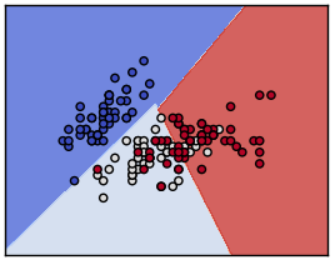

Write your code by creating cells below.


**TASK 2**: SVM                         **(33 Marks)**

Let's use the same dataset_1.csv for this task. It can be observed that the data was not perfectly linearly seperable with logistic classfier. One-vs-Rest (OVR) SVM, is an approach used in multiclass classification tasks. In this strategy, a separate binary support vector machine (SVM) classifier is trained for each class in the dataset, treating it as the positive class while considering all other classes as the negative class. **Reference:** Slide 21 of [OVR SVM](https://www.cse.iitk.ac.in/users/piyush/courses/ml_autumn18/material/771_A18_lec11_print.pdf)

1. Implement a OVR SVM classifier. Try to find the optimal penalty (or regularization) parameter $C$. Plot the decision boundary for optimal classifier. Also plot the number of violated points (misclassified points) and number of support vectors on Y axis against different $C$ values on X-axis. Report your observations. (5 + 2 + 2 + 2 + 2 + 2 Marks)

2. Try to fit a non linear SVM say polynomial kernel (degree=$3$) and RBF kernel.  Compare the results for both classifier. Does RBF leads to overfitting? Plot the decision boundary for optimal classifier in both kernels. (2+2+2+3+2+2 Marks)

3. Evaluate your classifier performance using precision, recall and f1-score. Report your observations. **Note:** You can use [sklearn](https://scikit-learn.org/stable/modules/model_evaluation.html) metrics for this part only. (3+2 Marks)

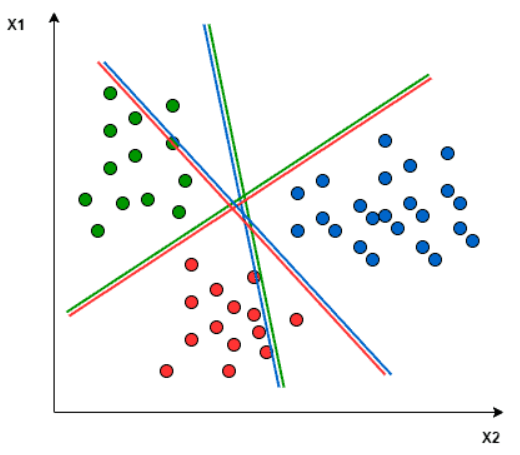

**Note:**

**Confusion Matrix:** A confusion matrix is a performance measurement tool used in classification problems, particularly in machine learning. It provides a detailed breakdown of the model's predictions, allowing the assessment of the model's accuracy and error types.

**Precision:** Precision measures the accuracy of the positive predictions made by the model.

**Recall:** Recall measures the ability of the model to capture all the positive instances in the dataset.

**F1-score:** The F1 score is the harmonic mean of precision and recall. It provides a balance between precision and recall, taking into account both false positives and false negatives. The F1 score is useful when there is an uneven class distribution and a need to consider trade-offs between precision and recall.


Write your code by creating cells below.



**TASK 3**: Decision Tree and Gradient Boosted Trees                      **(27 Marks)**

### **Gradient Boosted Trees**

**Decision Trees:** Decision trees are the base learners used in GBT. These are simple tree-like structures where each internal node represents a decision based on a feature, and each leaf node represents the output label. Each decision tree in the ensemble is trained on a subset of the data.

**Boosting:** GBT uses boosting, a technique where each subsequent model tries to correct the errors made by the previous ones. In boosting, the models are trained sequentially, and at each iteration, the new model focuses on the examples that were misclassified by the previous models.

**Gradient Descent:** In GBT, the boosting process involves gradient descent optimization. During each iteration, the algorithm calculates the gradient of the loss function with respect to the ensemble's prediction. Then, it fits a new decision tree to the gradient values (residuals), effectively reducing the errors made by the previous models.

**Gradient Boosting:** In gradient boosting, the idea is to fit the new model (in this case, a decision tree) to the residual errors of the previous model. This means that each new tree is trained to predict the residuals, which are the differences between the actual values and the predictions of the ensemble so far.

**Learning Rate:** GBT introduces a parameter called the learning rate, which controls the contribution of each tree to the ensemble. A smaller learning rate makes the model more robust but requires more trees to be added to the ensemble.

**Ensemble Aggregation:** The final prediction of the GBT model is obtained by aggregating the predictions of all the individual decision trees (each is a form of weak learner) in the ensemble, typically through a weighted sum.

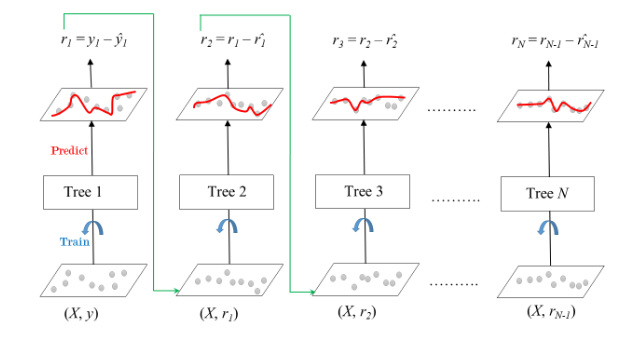


Now lets change the dataset and load dataset given below.

The dataset we used in the previous section had just two numeric attributes. In this section we will look at a slightly sophisticated dataset having a mix of numeric and categorical attributes describing a bank clients. Load the dataset "bank_data.csv". The task is to predict whether the client defined by the given set of attributes earns will subscirbe to a term deposit. Implement the following and state your results with respect to this dataset.

1. Implement the decision tree algorithm to classify whether the client defined by the given set of attributes earns will subscirbe to a term deposit or not. Divide the data into two sets: Training set  ($80\%$) and validation set ($20\%$). Plot the training error and validation error against the number of nodes present in the decision tree. (7 + 1 + 3 Marks)

2. Create 10 weak learners using code for the decision tree written previously.
If your model overfits or underfits then you can decrease or increase the number of weak learners. To optimize the ensemble there is going to be a trade off between learning rate and number of weak learners. Try to find the optimal learning rate and number of weak learners.  (5 + 6 Marks)

 y(pred) = (lr *  r1) + (lr * r2) + ....... + (lr * rN)

 Report the error on final prediction by using the formula given above. Did the performance improve? Report your findings. (You can fix number of nodes as best value obtained in previous part). (5 Marks)

Write your code by creating cells below.

## DO PREPARE A SEPARATE REPORT (in PDF format) for all your observations in each question. You can report any other observations as well and use your creativity to understand the concepts.